## **Enhancing Asset Portfolio Optimization with Deep-Learning**

By Harsh Sharma and Eric Nordal

### <font color='blue'>1. Objective</font>

Our project relates to asset portfolio optimization. Specifically, we use the concept of the efficient frontier from the Modern Portfolio Theory, and propose a solution that provides improved optimization results - enabling the risk-adjusted returns of the portfolio to move closer to the mathematical guarantee provided by the Markowitz model.

We focus the study on financial assets - selecting the S&P 500 stocks as they appropriately proxy the overall stock market. Since historical stock behavior is not a precise indicator of future performance, we focus on improving the optimization by calculating the predicted expected returns that compare better than returns computed solely on the past data. For predictions we use a 'Deep learning' method called the 'long short-term memory' networks (LSTM). Subsequently, we feed the predicted values back in the Markowitz model to calculate a better-optimized asset portfolio.

### <font color='blue'>2. Relevant Concepts</font>

The sections provides brief background knowledge of the relevant concepts used in this project.

#### 2.1 Efficient Frontier

The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return [1].  

<center><img src="https://raw.githubusercontent.com/hs235/Econ323Public/main/markowitz.png" width="400px" height="400px"></center>

Markowitz model, underlying the creation of the efficient frontier, has the following limitations:
- Approach not based on current data; information is determined through historical data.
- The model hinges on assumptions; sometimes, these assumptions become irrelevant, esp. with volatile markets.
- Reliance on variance when it should ideally focus on risks. [2]

#### 2.2 LSTM

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.  
    
The central role of an LSTM model is held by a memory cell known as a ‘cell state’ that maintains its state over time. The cell state is the horizontal line that runs through the top of the below diagram. It can be visualized as a conveyor belt through which information flows unchanged. 

Information can be added to or removed from the cell state in LSTM and is regulated by gates. These gates optionally let the information flow in and out of the cell. It contains a pointwise multiplication operation and a sigmoid neural net layer that assist the mechanism. The sigmoid layer gives out numbers between zero and one, where zero means ‘nothing should be let through’, and one means ‘everything should be let through’ [3].

<center><img src="https://raw.githubusercontent.com/hs235/Econ323Public/main/lstm.png" width="500px" height="250px"></center>  

Fischer and Krauss (2018) implemented the LSTM neural network to predict the directional movement of the constituent stocks of the S&P 500 from 1992 to 2015. The study found that the portfolio based on the LSTM outperformed the other machine learning models without a memory function (i.e., RF, DNN, and LR) [4].

In summary, the LSTM model, is currently the state of the art for stock prediction in many use cases because:
- The memory cells capture short-term and long-term seasonalities patterns
- Different gates capture the non-linear relationships for forecasting

### <font color='blue'>3. Problem Validation</font>

We explore the validity of a significant assumption of the Markowitz model as applied in the financial setting i.e. historical returns and risks are good indicators of future expected behavior. Thus, we analyze (in CodeSection C) the returns of the S&P 500 index over the past five years and present the results in the two figures below. 

<img src="https://raw.githubusercontent.com/hs235/Econ323Public/main/sp500_histogram.png" width="500" height="375" align="center">

It can be seen that the returns do not fully align with the Gaussian distribution:
- Distribution is left skewed due to higher losses on the tail end compared to profits
- Presence of extreme outliers on the tail ends due to large market fluctuations
- Seems like the middle of the distribution curve has a scaled parameter effect, i.e. skinnier than the Gaussian distribution 

<img src="https://raw.githubusercontent.com/hs235/Econ323Public/main/sp500_qq.png" width="500" height="375" align="center">

The qq plot above also confirms the previous observations. This means that a better optimization solution would involve a more accurate estimation of the asset's expected return for any long enough period. Further, it confirms that there are better representations than the risk calculated through standard deviation alone (based on a normal curve).

### <font color='blue'>4. Project Scope</font>

We define and limit the project scope per the following:

1. Transaction fees, taxes, and other costs not factored into asset return
2. Asset set limited to SP500
3. Fixed time period outlook
4. No shorting, options, or calls for asset allocation
5. No intangibles considered (eg. selective divestment)

### <font color='blue'>5. Data</font>

Following is a brief discussion of the three data sources used in the analysis. CodeSection B, below provides a detailed view of the data sets.

a) Stock information data
   - Individual data for S&P 500 companies is used
   - Downloaded using API from IEXfinance to enable seamless information updates and real-time analysis (appendix#)
   - Past five years of data is used
   - Data is queried at a daily frequency so we have information resolution needed to predict at daily time steps
   - For analysis, the 'close' values for stock are used

b) S&P 500 index data
   - Used for benchmarking and other exploratory data analysis
   - Manually downloaded for past 5 years at a daily frequency

c) S&P 500 sector data
   - Manually downloaded to augment information for companies adding their sectors and sub-sectors  
   - Provides deeper insight into results and is also used for rationality checks 

### <font color='blue'>6. Solution Design</font>

We design our solution selecting the following high level parameters and metrics.

+ **Portfolio Optimization**

    - *Expected returns:* annualized mean return in excess of market free rate
    
    - *Volatility:* standard deviation
    
    - *Optimization:* mean variance
    
+ **Performance Evaluation**
    - Compare performance w.r.t. a benchmark i.e. S&P 500 index
    
    - Comparing actual returns between our model and control
    
    - Multiple point backtest

+ **Asset Prediction**
    - *Input variables:* Same as control otherwise difficult to ascertain predictive power between independant variables when using deep learning models
    
    - *Prediction window:* At least 1 week, but ideally a few months.
    
    - *Evaluation:* RMSE

### <font color='blue'>7. Discussion</font>

This section includes commentary on noteworthy aspects of the analysis.

#### 7.1 Sharpe ratio calculation

Given the volatile condition of the market in the past few years, one of the preliminary metrics to determine was the duration over which the Sharpe ratio should be calculated. It was essential to determine this so that the optimization results are meaningful in that they're not strongly influenced simply by the short duration over which they are calculated due to market crash.

<img src="https://raw.githubusercontent.com/hs235/Econ323Public/main/SharpeRatio.png" width="600px" height="300px">

Thus, we plotted (in CodeSection F) the Sharpe ratio (dotted blue line in the figure above) as a function of time period. We notice that a stable value is reached if we consider the period over as the previous 10 quarters.

#### 7.2 Impact of Covid

Upon initially optimizing the asset set with all SP500 companies, we noticed an issue with the optimizer for various and differing time intervals. This was because during covid, there was a significant dip in the market during that period, and many companies had a negative rate of return over that period. Also, for many companies, the returns continued to stay low for a more extended period after covid. This caused the average (historical) expected returns to be less than the market free rate, ultimately making the matrix not a positive semi-definite and resulting in the solver error.

To reverse the negative numbers and ultimatley avoiding computational issues with the matrix, we added the following functionality to the optimization:
- Allowed shorting
- Fixed dollar amount allocation (to limit infinite shorting)
- Regularization (to avoid extreme allocations in the portfolio)

However, we did not test with these added functionalities due to the increased complexity in scope and limited time and compute resources.

Instead, we filtered the SP500 companies that provided a non-negative rate of return. Then we further filtered to get the best 40 companies based on their Sharpe ratios. Theoretically, this would not impact the optimization in our case, as the filtered set has many companies left with a return/volatility ratio greater than 0. This allows the optimization to operate on a smaller set such that the portfolio allocation outcome is the same.

We conducted (in CodeSection E) exploratory data analysis to understand the set of companies that had been filtered out due to a non-negative return (in excess of market free rate).

<img src="https://raw.githubusercontent.com/hs235/Econ323Public/main/covid1.png" width="600px" height="300px">

We observed that specific sectors, such as real estate, energy, and materials, were disproportionately impacted. This result was in alignment with the impact covid had. For example, we choose real estate and further explore the sub-industries within that sector to get a more resolution on the effect.

<img src="https://raw.githubusercontent.com/hs235/Econ323Public/main/covid2.png" width="600px" height="300px">

We can see above results are aligned with our hitorical knowledge - retail spaces, hotels, timber REITs were most impacted.

#### 7.3 LSTM Models

To optimize the LSTM model performance, we experimented with the following:
- Two hidden layers vs one hidden layer
- Different numbers of nodes in the hidden layers
- Different activation functions

We extensively tried to execute training on local GPU to no avail. We could execute on Goggle Colab GPU; however, it was much slower than the local CPU. Consequently, the code was executed on the local CPU. Thus, given the limited computing power and the extensive iterations of training required (one model per asset per period inspected), the experimentation of model parameters was done manually and iteratively instead of an automated process such as the gridCV search. 

Finally, we select a model with 2 hidden layers, 15 nodes each, with 'relu' activation function and 'adam' optimiser (CodeSection G). The model performs well for 1 time step ahead, with an average prediction falling within 7.55% of the actual stock value. However, the model performs poorly for multi-time steps ahead - significantly exaggerating the most recent trend.

Thus, we proceed with the 1 time step prediction and more narrowly define the value of our project as a short-term optimizer which, for example, can be used for weekly portfolio rebalancing.

### <font color='blue'>8. Results</font>

The final selected LSTM model trains on individual companies to predict their stock price one week out. These forecasted results for all the companies are then optimized per the Markowitz model. The optimization works as per the following:

- Asset returns are calculated based on the predicted values less the last asset price and normalized to yearly returns for parity
- The risk is calculated based on the standard deviation of the assets, not including the period of prediction. This method ensures that the risk factor is held constant - allowing only our target variable to be different in comparison. 

Following is the summary table delineating the model performance and benchmarks:

<center><img src="https://raw.githubusercontent.com/hs235/Econ323Public/main/eval.png" width="400px" height="300px"></center>

The above results are to be interpreted as the money, if invested at that particular date via the three methods, would provide the corresponding returns one week after.

Due to time limitations, the current analysis was repeated for two arbitrary points, i.e. one at a recent date and another a quarter before that. Given the limited no. of comparison data points, it's inconclusive to comment on the true model performance. However, the model results are reasonable in the sense that the range is comparable to scenarios for investing in the S&P index fund and a portfolio optimized using the traditional Markowitz model.

For future works, we recommend repeating the analysis for a continuous period to assess the model performance.

### <font color='blue'>9. References</font>

1. https://www.investopedia.com/terms/e/efficientfrontier.asp

2. https://www.wallstreetmojo.com/markowitz-model/#:~:text=The%20Harry%20Markowitz%20Model%20states,investor%20may%20have%20to%20bear.

3. https://intellipaat.com/blog/what-is-lstm/?US#:~:text='%20LSTM%20stands%20for%20long%20short,especially%20in%20sequence%20prediction%20problems.

4. Fischer, Thomas, and Christopher Krauss. 2018. Deep learning with long short-term memory networks for financial market predictions. European Journal of Operational Research 270: 654–69.

### <font color='#CC0000'>CodeSection A: Overall Setup</font>

#### Libraries

In [4]:
## Importing necessesary libraries

import pandas as pd
import numpy as np
import os as os
import math
import datetime as dt
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
import warnings
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import plotly.graph_objects as go

#### Global Variables

In [5]:
## Declaring Global Variables and global settings

date_of_interest = '01-March-2023' #Demarkation point after which prediction starts, inputted by the user
RiskFreeRate = 0.0425 #Current long-term average of US treasury rate for 10 year yield
warnings.filterwarnings('ignore')

#### General Functions

In [369]:
## Defining Functions

# To prevent breaking of optimizer for assets returning exp return less than market free rate 
def optimize_safe(df):
    try:
        optimize(df)
    except:
        return 'LowSharpeRatio', 'error'

# Function to calculate net value change over a time period for a multi-asset portfolio
def value_change(df, weights_df, period = 1):
    value_2 = df.iloc[(-1)] @ weights_df.T
    value_1 = df.iloc[(-1 - period)] @ weights_df.T
    percent_return = 100*(value_2 - value_1)/value_1
    return percent_return

# Function to iterate a NxM dataframe into M dataframes of Nx2 each, where index is preserved onto all M generated dataframes
def df_splitter(df):
    splitted = [pd.DataFrame(df[col]) for col in df.columns]
    return splitted

---

### <font color='#CC0000'>CodeSection B: Data</font>

This sections provides an overview of the main data sources used and displays a brief section for each:
1. SP500 sector information
2. SP500 index
3. SP500 companies

In [10]:
# Inputting data

# Reading secondary data regarding sp500 companies
sector = pd.read_csv("sp500SectorInfo.csv")
sector = sector[["symbol","security","sector","sub-industry"]]
sector.head()

,symbol,security,sector,sub-industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


In [11]:
# Reading data for sp500 index
sp500 = pd.read_csv("INDEX_US_S&P 5yr.csv", parse_dates=['date'])
sp500.set_index('date', inplace=True)
sp500 = sp500[['close']]
sp500 = sp500.astype(float)
sp500.sort_index(inplace=True)
sp500.head()

,close
date,
2018-06-05,2748.80
2018-06-06,2772.35
2018-06-07,2770.37
2018-06-08,2779.03
2018-06-11,2782.00


In [12]:
# Reading stock marlet price data for sp500 companies
data = pd.read_csv("data.csv", parse_dates=['date'])
data.set_index('date', inplace=True)
data = data[['key', 'close']] #choosing to keep only closing pricesdf = data
df = data
df = pd.pivot_table(df, index='date', columns='key')

In [13]:
# Code to correct key/index arrangement
df.to_csv('OutFile.csv')
test = pd.read_csv('OutFile.csv')

if test.columns.values[0] != "date":
    test = test.rename(columns=test.iloc[0])
    test.rename(columns={'key': 'date'}, inplace=True)
    test = test.drop([0,1])
    test = test.set_index("date")
    test.to_csv('OutFile.csv')
#print(test)

In [14]:
# Code to correct key/index arrangement
df_original = pd.read_csv("OutFile.csv", index_col='date', parse_dates=['date'])
df=df_original.copy()
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2018-06-05,63.52,44.18,129.95,48.3275,99.24,84.79,63.03,27.0267,159.92,252.70,...,176.88,43.32,80.68,42.29,71.66,82.91,113.14,156.78,NaN,84.76
2018-06-06,65.19,44.19,130.59,48.4950,99.98,87.15,63.54,27.2000,162.71,253.95,...,179.51,42.35,82.06,43.01,72.62,83.61,114.18,158.98,NaN,85.47
2018-06-07,65.23,43.84,130.05,48.3650,99.32,86.60,63.18,27.2133,160.61,247.51,...,176.25,42.72,82.88,43.11,73.11,84.19,113.67,158.17,NaN,85.66
2018-06-08,65.73,43.11,131.71,47.9250,100.43,86.09,63.27,28.0967,162.17,251.21,...,178.12,42.69,83.60,42.96,73.27,83.18,114.50,160.66,NaN,86.78
2018-06-11,66.13,44.16,132.73,47.8075,99.77,87.28,63.13,27.8267,162.75,251.00,...,180.82,42.13,83.10,43.40,71.82,83.11,114.21,158.78,NaN,87.06


### <font color='#CC0000'>CodeSection C: Distribution of SP500 Returns</font>

In this section we examine the frequency distribution of returns from the SP500 index - which is a proxy indicator to the returns from the stock market. Aim is to determine how closely does it follow a gaussian distribution.

In [109]:
sp500_returns = sp500.copy()

sp500_returns["daily"] = (sp500_returns["close"]/sp500_returns["close"].shift(1))-1
sp500_returns.dropna(inplace = True)
sp500_returns = sp500_returns.resample("W").mean()
sp500_returns = sp500_returns.rename(columns={"daily": "weekly return"})
#sp500_returns.head()

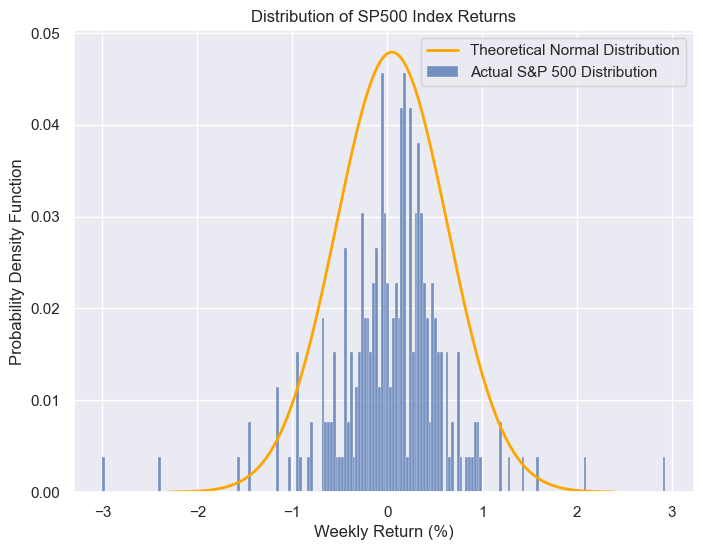

In [126]:
# Plotting Histogram

def normal(mean, std, histmax=False, color="orange"):
    """Based on code from this post: https://stackoverflow.com/a/66893884"""
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = stats.norm.pdf(x, mean, std)
    if histmax:
        p = p*histmax/max(p)
    z = plt.plot(x*100, p, color, linewidth=2, label="Theoretical Normal Distribution")
    return

#data = np.random.normal(size=1000)    
ax = sns.histplot(sp500_returns["weekly return"]*100.0, kde=False, bins=200, stat="probability", label="Actual S&P 500 Distribution")
normal(sp500_returns["weekly return"].mean(), sp500_returns["weekly return"].std(), histmax=ax.get_ylim()[1])
ax.set(xlabel="Weekly Return (%)", ylabel="Probability Density Function")
ax.legend()
ax.set(title="Distribution of SP500 Index Returns")
sns.set(rc={"figure.figsize":(8,6)})
#plt.savefig("sp500_histogram.png") #uncomment to save again

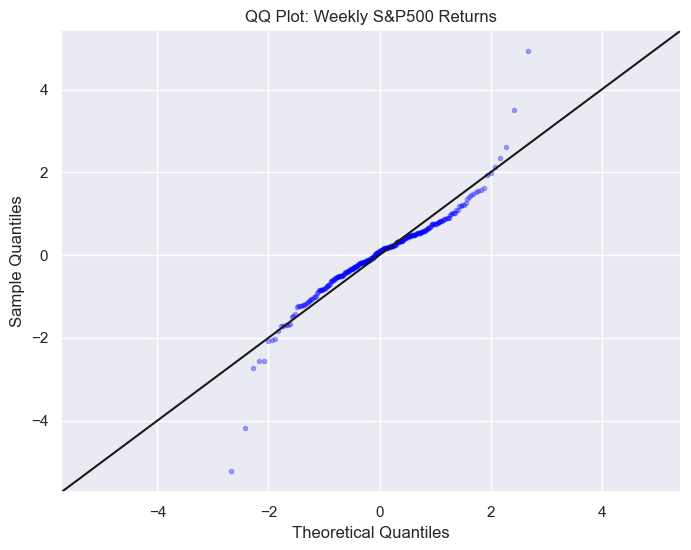

In [108]:
# qq plot

pp = sm.ProbPlot(sp500_returns["weekly return"], fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='blue', markeredgecolor='blue', alpha=0.3)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.title("QQ Plot: Weekly S&P500 Returns")
plt.show()
#plt.savefig("sp500_qq.png") #uncomment to save again

### <font color='#CC0000'>CodeSection D: Optimizer</font>

In [408]:
## Portfolio Optimizer
## Using the open source library from https://pypi.org/project/pyportfolio/

def optimize(df_to_opt, forecast=False):
    
    #portfolio allocation
    latest_prices = df_to_opt.iloc[-1,:]
    
    if (not forecast):
        # Calculate expected returns and sample covariance
        mu = expected_returns.mean_historical_return(df_to_opt)
        S = risk_models.sample_cov(df_to_opt)
        
    if (forecast):
        # Calculate expected returns and sample covariance
        temporary = df_to_opt.tail(2)
        temporary = temporary.pct_change()
        temporary = temporary*52
        mu = temporary.iloc[-1,:] #requires a series input
                
        #mu = expected_returns.mean_historical_return(temporary)
        temporary2 = df_to_opt.iloc[:-1,:]  #not to include predicted value in calculating volatility metric
        S = risk_models.sample_cov(temporary2)

    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S, verbose=False) # weight_bounds=(0, 1)
    #ef.add_objective(objective_functions.L2_reg, gamma=0.5) #adding regularization
    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    ef.save_weights_to_file("weights.csv")  #saves to file
    print(cleaned_weights)
    opt_result = ef.portfolio_performance(verbose=True)
    opt_weights = pd.DataFrame(cleaned_weights, columns=cleaned_weights.keys(), index=[0])
    
    # Portfolio dollar value allocation
    #da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
    #allocation, leftover = da.greedy_portfolio()
    #print("Discrete allocation:", allocation)
    #print("Funds remaining: ${:.2f}".format(leftover))
    ##allocationDF = pd.DataFrame.from_dict(allocation)
    ##allocationDF.to_csv("DiscreteAllocation.csv")
    
    return opt_result, opt_weights

### <font color='#CC0000'>CodeSection E: Covid Impact</font>

The prolonged duration and The following below code block shows that going past 1 year i.e. optimizer 

In [39]:
%%capture
# to check the optimum timeframe for optimiser
optimize_vs_time = []
quarters = 4 # value greater than 4 will result in error raised from computing the matrix 

for i in range(1, quarters+1, 1):
    days = i*90    #90 days to step every quarter for upto 5 years
    df_temp = df.tail(days)
    opt_result, opt_weight = optimize(df_temp)
    optimize_vs_time.append(opt_result)
    
del df_temp

In [41]:
# ToDo Include Names on columns
optimize_vs_time

[(1.8402752392996244, 0.135758833219203, 13.408153238622173),
 (1.5971915792871345, 0.2043138679140145, 7.719454363963662),
 (0.9640297824512016, 0.19113765746900466, 4.939004667901655),
 (0.6644279001084338, 0.17251364143474002, 3.73551850595081)]

Identifying the companies that have valid non-negative returns over free market rate:

In [154]:
%%capture

filtered_assets = []

for col in df:
    temp = pd.DataFrame(df[col])
    try:
        optimize_old(temp)
    except:
        continue
    else:
        filtered_assets.append(col)

In [155]:
print(f"Filtered companies remaining in the optimization set: {len(filtered_assets)}")

Filtered companies remaining in the optimization set: 343


In [179]:
df_filtered = df[filtered_assets].copy()
df_filtered.head()

,A,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WRB,WST,WTW,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2018-06-05,63.52,48.3275,99.24,84.79,63.03,27.0267,159.92,252.70,100.64,44.23,...,34.2622,95.03,153.14,43.32,80.68,71.66,82.91,113.14,156.78,84.76
2018-06-06,65.19,48.4950,99.98,87.15,63.54,27.2000,162.71,253.95,102.10,44.79,...,34.5778,96.33,154.91,42.35,82.06,72.62,83.61,114.18,158.98,85.47
2018-06-07,65.23,48.3650,99.32,86.60,63.18,27.2133,160.61,247.51,101.96,44.69,...,34.7556,95.30,155.89,42.72,82.88,73.11,84.19,113.67,158.17,85.66
2018-06-08,65.73,47.9250,100.43,86.09,63.27,28.0967,162.17,251.21,101.06,44.85,...,34.8044,96.75,158.13,42.69,83.60,73.27,83.18,114.50,160.66,86.78
2018-06-11,66.13,47.8075,99.77,87.28,63.13,27.8267,162.75,251.00,101.39,45.51,...,34.6533,97.27,157.51,42.13,83.10,71.82,83.11,114.21,158.78,87.06


In [161]:
%%capture

filtered_assets_high = []
sharpe_ratio = []

for col in df_filtered:
    temp = pd.DataFrame(df_filtered[col])
    a, b = optimize_old(temp)
    filtered_assets_high.append(col)
    sharpe_ratio.append(a[2])

In [360]:
df_filtered_high = pd.DataFrame(list(zip(filtered_assets_high, sharpe_ratio)))
df_filtered_high = df_filtered_high.sort_values(1, ascending=False)
filtering_list = df_filtered_high.head(40).copy()
list_40=list(filtering_list[0])
df_filtered = df[list_40].copy()
df_filtered

,GEHC,ENPH,LLY,CARR,CEG,CDNS,SNPS,PWR,AZO,HSY,...,MOH,KLAC,RSG,AVGO,MSI,MMC,TMO,LIN,MSCI,BRO
date,,,,,,,,,,,,,,,,,,,,,
2018-06-05,NaN,5.62,84.82,NaN,NaN,43.69,90.30,36.95,654.14,90.50,...,85.64,118.13,67.94,259.26,112.34,81.11,214.77,NaN,163.71,28.15
2018-06-06,NaN,5.30,85.93,NaN,NaN,44.12,91.43,37.10,656.14,90.55,...,86.39,117.43,68.25,263.52,113.58,81.57,218.27,NaN,165.45,28.10
2018-06-07,NaN,5.32,85.88,NaN,NaN,44.08,90.12,37.14,664.81,91.08,...,86.69,115.93,68.12,264.68,112.22,82.19,216.46,NaN,165.22,28.12
2018-06-08,NaN,5.03,86.08,NaN,NaN,44.07,90.51,37.11,674.39,91.77,...,87.67,114.20,68.24,257.97,112.30,82.90,217.02,NaN,166.29,28.48
2018-06-11,NaN,4.62,85.86,NaN,NaN,44.25,90.59,36.82,690.01,92.41,...,90.84,112.47,68.72,260.83,112.51,82.41,217.34,NaN,166.49,28.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30,77.96,174.12,427.24,41.75,83.70,234.75,464.83,181.17,2454.64,256.37,...,269.86,458.73,142.00,803.34,285.03,174.32,514.22,354.91,471.41,62.98
2023-05-31,79.51,173.88,429.46,40.90,84.02,230.91,454.96,177.58,2386.84,259.70,...,273.90,442.99,141.63,807.96,281.92,173.18,508.46,353.66,470.53,62.33
2023-06-01,79.83,181.47,436.49,41.50,88.88,232.39,454.55,176.05,2373.58,259.66,...,282.97,452.53,142.73,789.95,282.22,174.42,519.38,355.49,466.97,62.75


Analyzing filtered companies by sector info to detect any relevant patterns:

In [134]:
j = pd.DataFrame(df.columns)
j.rename(columns = {0:'ticker'}, inplace = True)
sector_dist = pd.merge(j, sector, how="left", left_on="ticker", right_on="symbol")
del j
sector_dist.drop("symbol", axis=1, inplace=True)
a = pd.DataFrame(sector_dist['sector'].value_counts())

In [135]:
j = pd.DataFrame(df_filtered.columns)
j.rename(columns = {0:'ticker'}, inplace = True)
filt_sector_dist = pd.merge(j, sector, how="left", left_on="ticker", right_on="symbol")
del j
filt_sector_dist.drop("symbol", axis=1, inplace=True)
b = filt_sector_dist['sector'].value_counts()

In [136]:
a['Remaining Count'] = b
a["Remaining %"] = 100*(a["Remaining Count"]/a["sector"])
a.sort_values('Remaining %', ascending=False, inplace=True)
a = a.round(1)

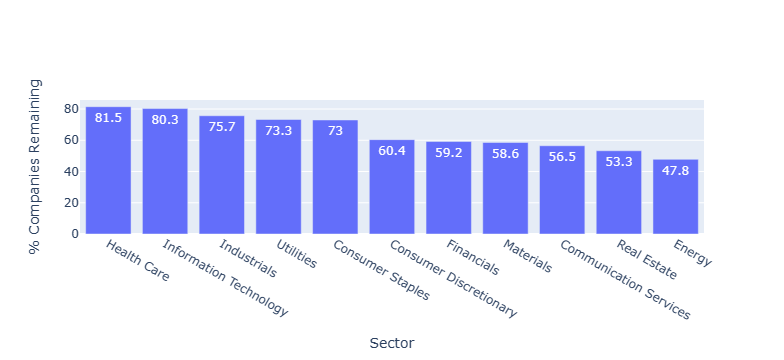

In [151]:
fig = go.Figure(data=[
    #go.Bar(name='SP500', x=a.index, y=a['sector']),
    #go.Bar(name='SP500 Filtered', x=a.index, y=a['Remaining Count']),
    go.Bar(name='Remaining %', x=a.index, y=a['Remaining %'], text=a['Remaining %'])
])
# Change the bar mode
#fig.update_layout(barmode='group')
fig.update_layout(legend_title_text = "High Performers")
fig.update_xaxes(title_text="Sector")
fig.update_yaxes(title_text="% Companies Remaining")
fig.show()

Observing pattern above, which aligns with intuition and practicality, we further analyze the companies within the real estate sector to detect more precise behavior:

In [49]:
j = pd.DataFrame(df.columns)
j.rename(columns = {0:'ticker'}, inplace = True)
industry_dist = pd.merge(j, sector, how="left", left_on="ticker", right_on="symbol")
del j #deleting temp dataframes
industry_dist.drop("symbol", axis=1, inplace=True)
industry_dist = industry_dist.loc[industry_dist['sector']=='Real Estate']
c = pd.DataFrame(industry_dist['sub-industry'].value_counts())

In [50]:
j = pd.DataFrame(df_filtered.columns)
j.rename(columns = {0:'ticker'}, inplace = True)
filt_sector_dist = pd.merge(j, sector, how="left", left_on="ticker", right_on="symbol")
del j #deleting temp dataframe
filt_sector_dist.drop("symbol", axis=1, inplace=True)
filt_sector_dist = filt_sector_dist.loc[filt_sector_dist['sector'] == 'Real Estate']
d = filt_sector_dist['sub-industry'].value_counts()

In [51]:
c['Remaining Count'] = d
c['Remaining Count'] = c['Remaining Count'].fillna(0)
c["Remaining %"] = 100*c["Remaining Count"]/c["sub-industry"]
c.sort_values('Remaining %', ascending=False, inplace=True)
c = c.round(1)

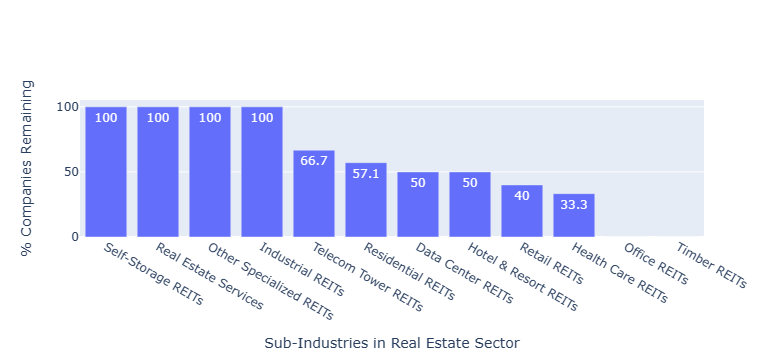

In [52]:
fig = go.Figure(data=[
    #go.Bar(name='SP500', x=a.index, y=a['sector']),
    #go.Bar(name='SP500 Filtered', x=a.index, y=a['Remaining Count']),
    go.Bar(name='Remaining %', x=c.index, y=c['Remaining %'], text=c['Remaining %'])
])
# Change the bar mode
#fig.update_layout(barmode='group')
fig.update_layout(legend_title_text = "High Performers")
fig.update_xaxes(title_text="Sub-Industries in Real Estate Sector")
fig.update_yaxes(title_text="% Companies Remaining")
fig.show()

del a, b, c, d #deleting temp dataframes

### <font color='#CC0000'>CodeSection F: Sharpe Ratio Calculation</font>

In [116]:
# to check the optimum timeframe for optimiser

timescale = []
sp500_return_vs_time = []
sp500_volatility_vs_time = []

for i in range(1, 21, 1):
    days = i*90    #90 days to step every quarter for upto 5 years
    df_temp = sp500.tail(days)
    result1 = expected_returns.mean_historical_return(df_temp)
    result2 = risk_models.sample_cov(df_temp)
    #opt_result, opt_weight = optimize(df_temp)
    sp500_return_vs_time.append(result1[0])
    sp500_volatility_vs_time.append(result2['close'][0])
    timescale.append(i)
    print((result2['close'][0]))
    
del df_temp

0.01970397949221047
0.03613737267364621
0.042947093332561886
0.047564849367812745
0.04189330526461632
0.03672178443069921
0.03433114087075359
0.03426064654117654
0.03888054591376224
0.0574009878644653
0.05395453784046053
0.050480473234771374
0.049889940824270146
0.04718875527047089
0.04691097312195751
0.04691097312195751
0.04691097312195751
0.04691097312195751
0.04691097312195751
0.04691097312195751


In [117]:
sp500_return_vs_time

[0.2138633369504217,
 0.30974907769293947,
 0.1215566847909153,
 -0.04564563854587389,
 -0.015853529622596896,
 0.024544529400573056,
 0.07344607205279563,
 0.10096532906035072,
 0.18105204790758656,
 0.10181323312285073,
 0.10178389127110421,
 0.11456368084976232,
 0.10795781578846375,
 0.09676388817559989,
 0.09856108983326717,
 0.09856108983326717,
 0.09856108983326717,
 0.09856108983326717,
 0.09856108983326717,
 0.09856108983326717]

In [118]:
timescale

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [119]:
sp500_perf = pd.DataFrame(list(zip(timescale, sp500_return_vs_time, sp500_volatility_vs_time)))
sp500_perf.reset_index
sp500_perf.rename(columns={0: "TimePeriod", 1:"Return", 2:'Volatility'}, inplace=True)
sp500_perf.set_index("TimePeriod", inplace=True)
sp500_perf["Return"] = sp500_perf["Return"]
sp500_perf["Sharpe Ratio"] = (sp500_perf["Return"] - RiskFreeRate)/sp500_perf["Volatility"]
sp500_perf

,Return,Volatility,Sharpe Ratio
TimePeriod,,,
1,0.213863,0.019704,8.696890
2,0.309749,0.036137,7.395365
3,0.121557,0.042947,1.840792
4,-0.045646,0.047565,-1.853168
5,-0.015854,0.041893,-1.392908
6,0.024545,0.036722,-0.488960
7,0.073446,0.034331,0.901399
8,0.100965,0.034261,1.706486
9,0.181052,0.038881,3.563531


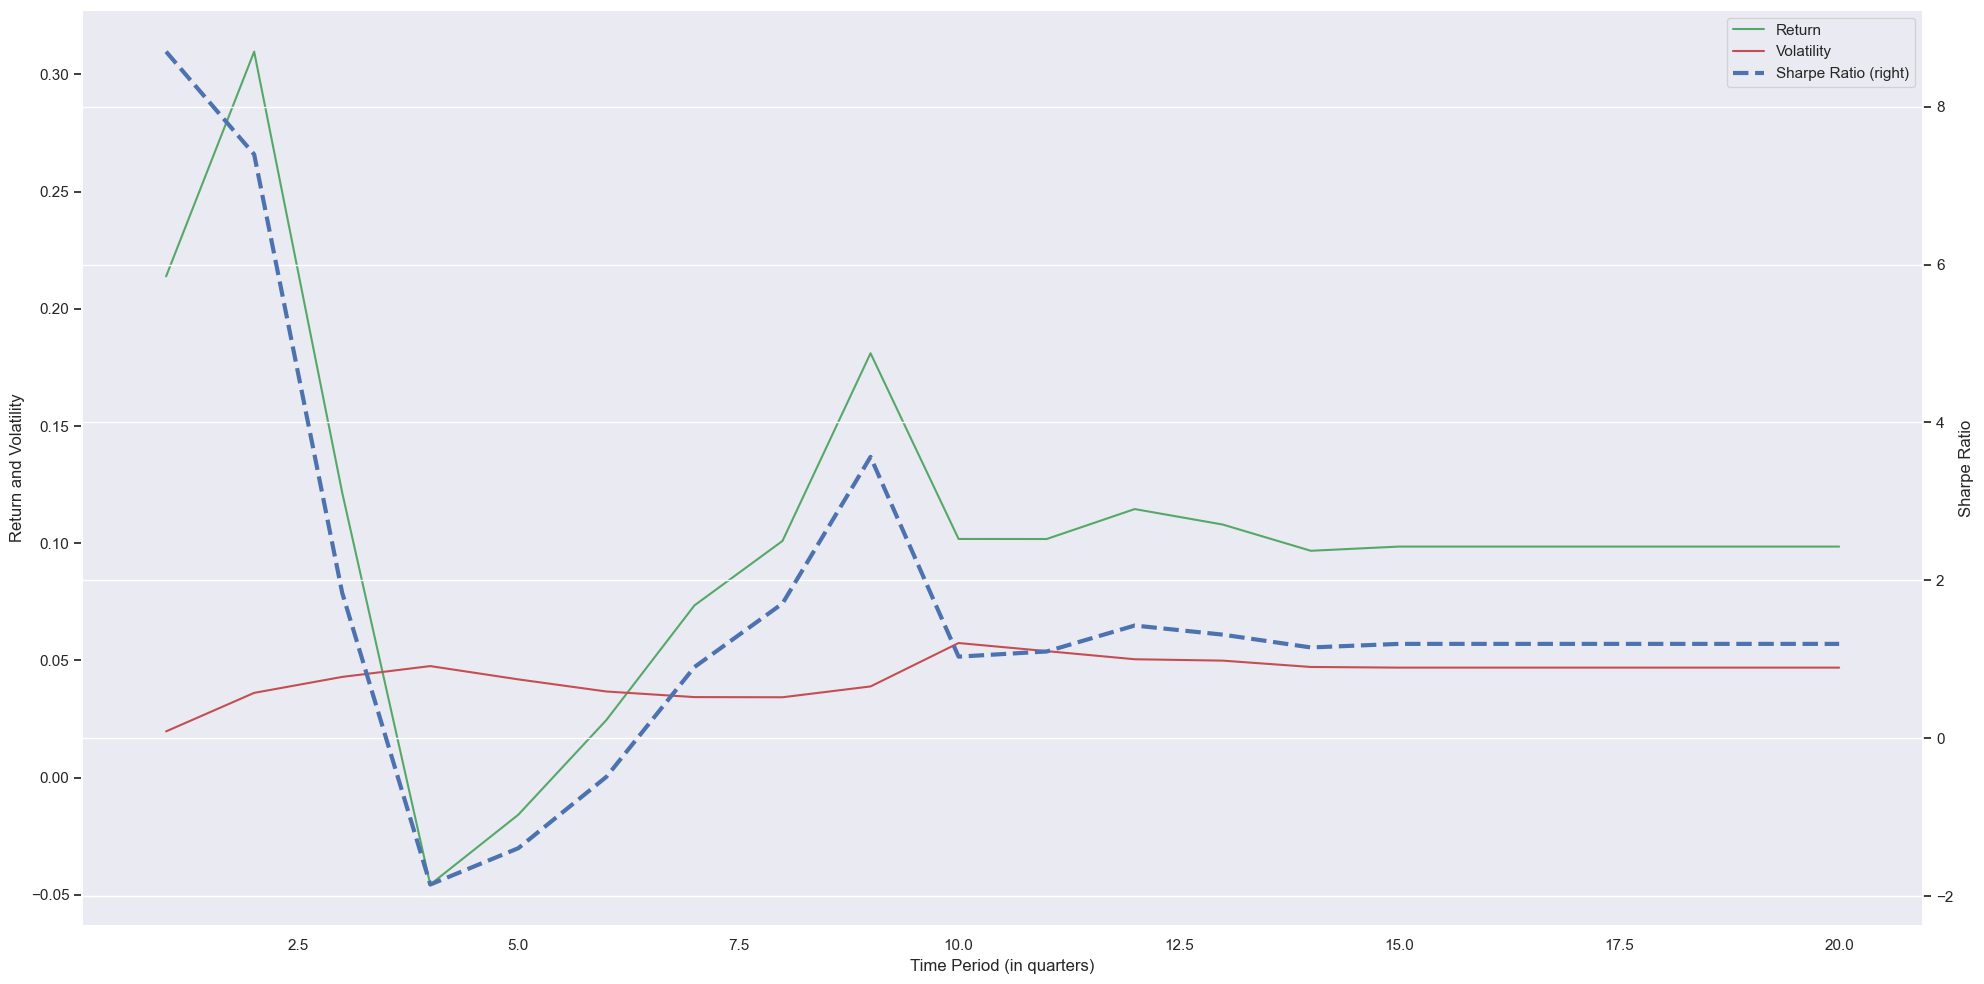

In [124]:
fig, ax = plt.subplots(figsize=(20,10))

sp500_perf.plot(y = 'Return', color='g', ax = ax)
sp500_perf.plot(y = 'Volatility', color='r', ax = ax)
sp500_perf.plot(y = 'Sharpe Ratio', color='b', ax = ax, linestyle='dashed', linewidth=3, secondary_y=True)
plt.ylabel("Return and Volatility")
ax.right_ax.set_ylabel('Sharpe Ratio')
ax.set_ylabel('Return and Volatility')
ax.set_xlabel('Time Period (in quarters)')
plt.tight_layout()
plt.savefig("SharpeRatio.png") #uncomment to save again

In [125]:
sp500_perf['Sharpe Ratio']

TimePeriod
1     8.696890
2     7.395365
3     1.840792
4    -1.853168
5    -1.392908
6    -0.488960
7     0.901399
8     1.706486
9     3.563531
10    1.033314
11    1.098775
12    1.427556
13    1.312044
14    1.149933
15    1.195053
16    1.195053
17    1.195053
18    1.195053
19    1.195053
20    1.195053
Name: Sharpe Ratio, dtype: float64

### <font color='#CC0000'>CodeSection G: LSTM</font>

In [62]:
#to run/test the forecasting on sp500
temp = sp500.copy()
temp = temp.resample('W').mean()
temp = temp[temp.index.year.isin([2021, 2022, 2023])]

In [130]:
%%capture

## LSTM Model
## Portions of code adopted from the following:
    # https://stackoverflow.com/questions/69785891/how-to-use-the-lstm-model-for-multi-step-forecasting
    # https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827

# Trains, tests, and forecasts asset by asset
def forecast(temp):
    
    window_size = 12 #Size of rolling window to train on (in weeks)
    
    values = temp.values
    training_data_len = math.ceil(len(values)* 0.8)

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))

    train_data = scaled_data[0: training_data_len, :]
    x_train = []
    y_train = []

    for i in range(window_size, len(train_data)):
        x_train.append(train_data[i-window_size:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    test_data = scaled_data[training_data_len-window_size: , : ]
    x_test = []
    y_test = values[training_data_len:]

    for i in range(window_size, len(test_data)):
        x_test.append(test_data[i-window_size:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    tf.random.set_seed(1)
    model = keras.Sequential()
    model.add(layers.LSTM(15, return_sequences=True, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(15, activation='relu', return_sequences=False))
    model.add(layers.Dense(5))
    model.add(layers.Dense(1))
    #model.summary()

    #start_time = time.time()
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=15 ,verbose=False) #Turn on for tuning
    #print(time.time()- start_time)

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse_mean = np.sqrt(np.mean(predictions - y_test)**2)
    rmse_sum = np.sqrt(np.sum(predictions - y_test)**2)
    print(rmse_mean, rmse_sum)

    # train = temp[:training_data_len]
    # validation = temp[training_data_len:]
    # validation['Predictions'] = predictions

    # plt.figure(figsize=(16,8))
    # plt.title('LSTM Model Prediction')
    # plt.xlabel('Date')
    # plt.ylabel('Close Price USD ($)')
    # #plt.plot(train)
    # plt.plot(validation[['close', 'Predictions']])
    # plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    # #plt.savefig('1.png')
    # plt.show()

    return predictions[-1][0], rmse_mean, rmse_sum

In [ ]:
'''
# generate the multi-step forecasts
n_future = 4
y_future = []

x_pred = x_test[-1:, :, :]  # last observed input sequence
y_pred = y_test[-1]         # last observed target value

for i in range(n_future):

    # feed the last forecast back to the model as an input
    x_pred = np.append(x_pred[:, 1:, :], y_pred.reshape(1, 1, 1), axis=1)

    # generate the next forecast
    y_pred = model.predict(x_pred)

    # save the forecast
    y_future.append(y_pred.flatten()[0])

# transform the forecasts back to the original scale
y_future = np.array(y_future).reshape(-1, 1)
y_future = scaler.inverse_transform(y_future)

y_future
'''

In [127]:
#plt.savefig('1.png')

### <font color='#CC0000'>CodeSection H: Optimizing the forecasted</font>

In [361]:
temp2 = df_filtered.copy()
temp2 = temp2[temp2.index.year.isin([2021, 2022, 2023])]
temp2 = temp2.resample('W').mean()
#temp = temp.iloc[:-25,:] #computing at 2 quarters earlier

In [113]:
individual_list = df_splitter(temp2)

In [ ]:
forecasted_df_summary = pd.DataFrame()

i = -1
name = []
rmse_mean = []
rmse_sum = []
value_pred = []
value_actual = []
start_time = time.time()

for j in individual_list:
    i += 1
    actual_value = j.iloc[-1,0]
    predicted_value, rmseMean, rmseSum = forecast(j)
    j.iloc[-1,0] = predicted_value
    name.append(individual_list[i].columns[0])
    rmse_mean.append(rmseMean)
    rmse_sum.append(rmseSum)
    value_actual.append(actual_value)
    value_pred.append(predicted_value)
    
    print(f"{i+1} of 343 completed")
    print(time.time()- start_time)

forecasted_df_summary["name"] = name
forecasted_df_summary["rmse_mean"] = rmse_mean
forecasted_df_summary["rmse_total"] = rmse_sum
forecasted_df_summary["value_actual"] = value_actual
forecasted_df_summary["value_pred"] = value_pred

forecasted_df_summary.to_csv("forecasted_df_summary.csv")

In [116]:
forecasted_df = pd.concat(individual_list ,axis=1)
forecasted_df.to_csv("forecasted_df.csv")

In [105]:
#f_df_0q = forecasted_df   # Saving model output result to file for current time T0
#f_df_1q = forecasted_df   # Saving model output result to file for current time T0 - 1 quarter
f_df_2q = forecasted_df    # Saving model output result to file for current time T0 - 2 quarters

### <font color='#CC0000'>CodeSection I: Evaluation</font>

In [362]:
# Adding additional data to resolve solver issues
added = df_filtered[df_filtered.index.year.isin([2018, 2019])]
added = added.resample('W').mean()

In [303]:
# Reading back in results generated
filtered_T = pd.read_csv('filtered_forecasted_T.csv', index_col='date')
filtered_T = filtered_T[list_40]
filtered_T = pd.concat([added, filtered_T])
filtered_T.index = pd.to_datetime(filtered_T.index, format = '%Y/%m/%d').strftime('%Y-%m-%d')
filtered_Tm1q = pd.read_csv('filtered_forecasted_T-1quarter.csv', index_col='date')
filtered_Tm1q = filtered_Tm1q[list_40]
filtered_Tm1q = pd.concat([added, filtered_Tm1q])
filtered_Tm1q.index = pd.to_datetime(filtered_Tm1q.index, format = '%Y/%m/%d').strftime('%Y-%m-%d')
filtered_Tm2q = pd.read_csv('filtered_forecasted_T-2quarter.csv', index_col='date')
filtered_Tm2q = filtered_Tm2q[list_40]
filtered_Tm2q = pd.concat([added, filtered_Tm2q])
filtered_Tm2q.index = pd.to_datetime(filtered_Tm2q.index, format = '%Y/%m/%d').strftime('%Y-%m-%d')

list_lstm_optimized = [filtered_T, filtered_Tm1q]

In [409]:
#lstm:

lstmOptimized=[]
df_filtered_weekly = df_filtered.resample('W').mean()

opt_result, opt_weight = optimize(filtered_T, forecast=True)
#j.fillna(method='ffill', inplace=True)
return1 = value_change(df_filtered_weekly, opt_weight)
print("return is: ", return1)
lstmOptimized.append(return1[0])
opt_weight.to_csv(f"lstm_opt_weight_0.csv")

opt_result, opt_weight = optimize(filtered_Tm1q, forecast=True)
#j.fillna(method='ffill', inplace=True)
return1 = value_change(df_filtered_weekly, opt_weight)
print("return is: ", return1)
lstmOptimized.append(return1[0])
opt_weight.to_csv(f"lstm_opt_weight_1.csv")

OrderedDict([('GEHC', 0.0704), ('ENPH', 0.0), ('LLY', 0.0), ('CARR', 0.0), ('CEG', 0.0), ('CDNS', 0.0), ('SNPS', 0.0), ('PWR', 0.0), ('AZO', 0.04056), ('HSY', 0.0), ('CMG', 0.0), ('AJG', 0.0), ('TSLA', 0.0), ('FTNT', 0.0), ('ORLY', 0.88904), ('AMD', 0.0), ('AON', 0.0), ('AAPL', 0.0), ('WST', 0.0), ('MSFT', 0.0), ('COST', 0.0), ('NVDA', 0.0), ('DXCM', 0.0), ('FICO', 0.0), ('CPRT', 0.0), ('MCK', 0.0), ('OTIS', 0.0), ('MRNA', 0.0), ('ODFL', 0.0), ('TSCO', 0.0), ('MOH', 0.0), ('KLAC', 0.0), ('RSG', 0.0), ('AVGO', 0.0), ('MSI', 0.0), ('MMC', 0.0), ('TMO', 0.0), ('LIN', 0.0), ('MSCI', 0.0), ('BRO', 0.0)])
Expected annual return: 718.5%
Annual volatility: 36.3%
Sharpe Ratio: 19.75
return is:  0   -0.587226
dtype: float64
OrderedDict([('GEHC', 0.03469), ('ENPH', 0.0), ('LLY', 0.9032), ('CARR', 0.0), ('CEG', 0.0), ('CDNS', 0.0), ('SNPS', 0.0), ('PWR', 0.0), ('AZO', 0.0), ('HSY', 0.0), ('CMG', 0.0), ('AJG', 0.0), ('TSLA', 0.0), ('FTNT', 0.0), ('ORLY', 0.0), ('AMD', 0.0), ('AON', 0.0), ('AAPL', 0

In [410]:
# Index

index=[]
sp500_weekly = sp500.resample('W').mean()

opt_result, opt_weight = optimize(sp500_weekly, forecast=False)
return1 = value_change(sp500_weekly, opt_weight)
index.append(return1[0])
print("return is: ", return1)

opt_result, opt_weight = optimize(sp500_weekly.iloc[:-12,:], forecast=False)
return1 = value_change(sp500_weekly.iloc[:-12,:], opt_weight)
index.append(return1[0])
print("return is: ", return1)

OrderedDict([('close', 1.0)])
Expected annual return: 55.6%
Annual volatility: 34.3%
Sharpe Ratio: 1.56
return is:  0    2.325199
dtype: float64
OrderedDict([('close', 1.0)])
Expected annual return: 43.6%
Annual volatility: 34.9%
Sharpe Ratio: 1.19
return is:  0    1.367281
dtype: float64


In [411]:
# sp500 Optimized

optimized=[]
sp500_filtered = df_filtered.copy()
sp500_filtered_weekly = sp500_filtered.resample('W').mean()

opt_result, opt_weight = optimize(sp500_filtered_weekly, forecast=False)
return1 = value_change(sp500_filtered_weekly, opt_weight)
optimized.append(return1[0])
print("return is: ", return1)

opt_result, opt_weight = optimize(sp500_filtered_weekly.iloc[:-12,:], forecast=False)
return1 = value_change(sp500_filtered_weekly.iloc[:-12,:], opt_weight)
optimized.append(return1[0])
print("return is: ", return1)

OrderedDict([('GEHC', 0.61781), ('ENPH', 0.00296), ('LLY', 0.31445), ('CARR', 0.0), ('CEG', 0.0), ('CDNS', 0.0), ('SNPS', 0.0), ('PWR', 0.0), ('AZO', 0.0), ('HSY', 0.05095), ('CMG', 0.0), ('AJG', 0.0), ('TSLA', 0.0), ('FTNT', 0.0), ('ORLY', 0.0), ('AMD', 0.00741), ('AON', 0.0), ('AAPL', 0.0), ('WST', 0.0), ('MSFT', 0.0), ('COST', 0.0), ('NVDA', 0.0), ('DXCM', 0.00084), ('FICO', 0.0), ('CPRT', 0.0), ('MCK', 0.0), ('OTIS', 0.0), ('MRNA', 0.0), ('ODFL', 0.0), ('TSCO', 0.0), ('MOH', 0.00558), ('KLAC', 0.0), ('RSG', 0.0), ('AVGO', 0.0), ('MSI', 0.0), ('MMC', 0.0), ('TMO', 0.0), ('LIN', 0.0), ('MSCI', 0.0), ('BRO', 0.0)])
Expected annual return: 2060.1%
Annual volatility: 27.4%
Sharpe Ratio: 75.05
return is:  0    2.027431
dtype: float64
OrderedDict([('GEHC', 0.72278), ('ENPH', 0.03258), ('LLY', 0.12923), ('CARR', 0.0), ('CEG', 0.0), ('CDNS', 0.0), ('SNPS', 0.0), ('PWR', 0.0), ('AZO', 0.0), ('HSY', 0.08845), ('CMG', 0.0), ('AJG', 0.0), ('TSLA', 0.0), ('FTNT', 0.0), ('ORLY', 0.0), ('AMD', 0.0

In [412]:
# Creating the dataframe for performance summary
evaluation = pd.DataFrame()
time=['t', 't - 1 quarter']
evaluation['Time']=time
evaluation['SP500 Index']=index
evaluation['Optimized Portfolio']=optimized
evaluation['LSTM Optimized Portfolio']=lstmOptimized
evaluation = evaluation.round(decimals=2)
evaluation['SP500 Index'] = evaluation['SP500 Index'].astype(str) + '%'
evaluation['Optimized Portfolio'] = evaluation['Optimized Portfolio'].astype(str) + '%'
evaluation['LSTM Optimized Portfolio'] = evaluation['LSTM Optimized Portfolio'].astype(str) + '%'

In [413]:
evaluation.to_csv('evaluation_table.csv')

In [414]:
evaluation

,Time,SP500 Index,Optimized Portfolio,LSTM Optimized Portfolio
0,t,2.33%,2.03%,-0.59%
1,t - 1 quarter,1.37%,1.45%,2.31%


### <font color='#CC0000'>Appendix A: Accessing Stock Market Data</font>

This section provides the code generated for accessing stock market data via API in a manner that can be updated automatically for current as well as real-time analysis.

In [ ]:
# Remove comment block to run the code below
# Expected runtime to generate the latest dataset is approx. 20min due to IEX finance API limitation

"""
pip install iexfinance
pip install beautifulsoup4
pip install lxml

import requests
import csv
from datetime import date, timedelta, datetime
from dateutil.relativedelta import relativedelta
from bs4 import BeautifulSoup
from iexfinance.stocks import get_historical_data, get_historical_intraday, Stock

#IEX Finance API no longer offers a free version so this key will have to be replaced weekly when the free trial expires
# provided public api key is no longer valid, please insert your own
api_key = "pk_f85211ff18244b6cb07ec6c9e37723f3"

def get_tickers():
    '''Returns an array of stock tickers from wikipedia.org/wiki/List_of_S%26P_500_companies'''
    html_text = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies").text
    soup = BeautifulSoup(html_text, "lxml")
    table = soup.find("table", class_ = "wikitable sortable")
    company_elements = table.find_all("a", class_ = "external text")

    tickers = []

    for company_element in company_elements:
        company = str(company_element.contents[0]).lower()
        if company not in tickers:
            tickers.append(company.upper())
            
    return tickers
    
tickers = get_tickers()

def create_sorted_historical_csv(tickers):
    '''Creates a sorted csv of historical stock data for the past 5 years for the given list of stock tickers'''
    start = datetime(2018, 6, 4)
    end = datetime(2023, 6, 4)

    df = pd.DataFrame()
    data_frame_list = []

    for ticker in tickers:
        df = get_historical_data(ticker, start, end, output_format='pandas', token=api_key)
        df = df.drop(["id", "subkey", "updated", "label", "change", "high", "fHigh", "uHigh", "low", "uLow", "fLow"], axis=1)
        data_frame_list.append(df)

    df2 = pd.concat(data_frame_list)
    df2 = df2.sort_values(by=["priceDate"])
    df2.insert(0, 'Helpers', range(0, len(df2)))
    df2 = df2.set_index("priceDate")
    df2.to_csv("SP500DataSetDateSorted.csv")
    print(df2)
    
#create_sorted_historical_csv(tickers)
def update_data_set(to_be_updated, tickers, start_date=str((datetime.strptime(pd.read_csv("SP500DataSetDateSorted.csv")["priceDate"].iloc[-1], '%Y-%m-%d') + timedelta(days=1)))[0:10], today_date=date.today()):
    '''Updates the given csv file to include the day after the last day already included to yesterdays date. Due to technical limitatons of the IEX Finance API, I was unable to find a way to use the get_historical_data function to pull stock data after the 4pm close as the API tracks after hours trading.'''
    df = pd.DataFrame()
    data_frame_list = []

    for ticker in tickers:
        df = get_historical_data(ticker, start_date, today_date, output_format='pandas', token=api_key)
        df = df.drop(["id", "subkey", "updated", "label", "change", "high", "fHigh", "uHigh", "low", "uLow", "fLow"], axis=1)
        data_frame_list.append(df)

    df2 = pd.concat(data_frame_list)
    df2 = df2.sort_values(by=["priceDate"])
    df_prev = pd.read_csv(to_be_updated)
    
    df_merged = pd.concat([df_prev, df2])
    
    day = str(date.today()-relativedelta(years=5))
    i = 1
    
    while True:
        if df_merged.index[df_merged["priceDate"].isin([day])==True].tolist() != []:
            #Removes the same number of days from the dataframe that were added to the dataframe. 
            #The range for removal goes from the date of the first element to the date of the last element added minus 5 years.
            #If that element doesn't exist, it will subtract one day and continue to do so until a valid day is found.
            df_merged.drop(df_merged.index[int(df_merged.iloc[0][1]):int(df_merged.index[df_merged["priceDate"].isin([day])==True].tolist()[0])], axis=0, inplace=True)
            break
        else:
            day = str(date.today()-relativedelta(years=5)-timedelta(days=i))
            if i == 5:
                break
            else:
                i+=1
        
    df_merged = df_merged.drop(["Helpers"], axis=1)
    df_merged.insert(0, "Helpers", range(0, len(df_merged)))
    df_merged = df_merged.set_index("priceDate")
    df_merged.to_csv("SP500DataSetDateSortedUpdated" + str(date.today()) + ".csv")
    
    
def create_key_stats_csv(tickers):
    '''Creates a csv of stock statistics for the current past fiscal quarter for the given list of stock tickers'''
    df3 = pd.DataFrame()
    data_frame_list_2 = []

    for ticker in tickers:
        df3 = Stock(ticker, token=api_key).get_key_stats()
        data_frame_list_2.append(df3)

    df4 = pd.concat(data_frame_list_2)
    df4.to_csv("SP500DataSetKeyStats.csv")
    
    
update_data_set("SP500DataSetDateSorted.csv", tickers)

"""